# Data-Based Economics: Coursework

Students (up to 3):

- x1 Gabrielle Labat
- x2 Manal Bendjedid

When working on the questions below, don't hesitate to take some initiatives. In particular, if you don't find how to answer a particular question (and you have asked 😉), feel free to propose a workaround.

Your work will be evaluated in the following dimensions:

1. Whether your notebook is replicable. When grading it, I should be able to run it from start to finish without error.
1. Whether it is well written and clear. There should always be legible text to explain what you do, and make it a nice read. Imagine that the document was meant to be published as an online tutorial.
2. Whether you have successfully solved the various theoretical and practical problems that are asked below.
3. Whether you have shown some sense of initiative in approaching the various problems, in making the plots or in proposing extensions.

## CO2 Emissions and the Kusnetz curve

In this exercise, you must use data from the WorldBank to check whether CO2 Emissions can be explained by income per capita.

### Importing the data

__Import the data from file `data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5177406.csv` as a dataframe `df_wide`. (This table was downloaded from the worldbank website)__

Hints: check the documentation from `pandas.read_csv()` to avoid the import error. You can check the first few lines of the file by typing in a cell:
`!data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5177406.csv`

Hint2: Check that all columns are well defined.

In [3]:
import pandas as pd
df_wide = pd.read_csv('data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5177406.csv', skiprows=4)
!data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5177406.csv

/bin/bash: line 1: data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5177406.csv: Permission denied


__Describe briefly the data.__ 


_The data contains information on the level of carbon dioxide (CO2) emissions per capita (in metric tons) for different countries and regions over the years 1960 to 2019. The data is sourced from the World Bank's World Development Indicators and is reported annually._

_The dataset contains 264 rows (corresponding to different countries and regions) and 61 columns (corresponding to the years 1960 to 2019 and additional columns with country and region information). The data is in a wide format, with each row representing a country/region and each column representing a year._

_The data is useful for analyzing trends in CO2 emissions over time and comparing emissions across countries and regions. It can also be used for exploring the relationship between CO2 emissions and various economic and environmental factors._

In [4]:
df_wide.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.288766,4.194242,4.141210,4.140690,4.148584,4.128191,4.086604,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.002821,4.862196,4.731198,4.653372,4.585664,4.489473,4.474616,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024987,0.027090,0.037289,0.029718,0.033815,0.035826,0.035704,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.720891,0.785259,0.771880,0.769068,0.802179,0.797275,0.790333,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.726281,2.888558,2.827949,2.760181,2.699348,2.979403,2.981762,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.264131,6.028664,5.792812,5.828931,6.021844,5.950694,5.890683,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.420762,36.875726,35.111798,33.493040,32.281678,31.235406,32.761775,NaN,NaN,NaN


### Cleaning up

__Convert the data into the long format using the function `pandas.melt()`. The columns of the new table `df_long` should be: `["Country Name","Country Code","Indicator Name","Indicator Code", "Date", "Emissions"]`__

In [5]:
df_long=pd.melt(df_wide,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],var_name="Date",value_name= "Emissions")
df_long

,Country Name,Country Code,Indicator Name,Indicator Code,Date,Emissions
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
...,...,...,...,...,...,...
16753,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,Unnamed: 66,NaN
16754,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,Unnamed: 66,NaN
16755,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,Unnamed: 66,NaN
16756,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,Unnamed: 66,NaN


__Eliminate all rows for which no emission data is available__

In [6]:
df_long.dropna()


,Country Name,Country Code,Indicator Name,Indicator Code,Date,Emissions
7981,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.982136
7982,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.222538
7983,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.473669
7984,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.554586
7985,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,1.819542
...,...,...,...,...,...,...
15954,Samoa,WSM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,1.415729
15956,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,0.351859
15957,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,7.568640
15958,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,0.369958


__Convert the `Date` column into a date format.__

*Hint: look for pandas.to_datetime() (This is not absolutely mandatory but makes graphs nicer)*

In [19]:
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%Y')
print(df_long['Date'].dtype)

ValueError: time data 'Unnamed: 66' does not match format '%Y' (match)

### Graphical representation

__Plot the evolution over time of total recorded carbon emissions (ommiting dates where no information is available).__

Hint: use `groupby()`

In [12]:
total_emissions=df_long[df_long['Emissions'].notnull()].groupby(df_long['Date'])['Emissions'].sum()
total_emissions

Date
1990     992.579902
1991     971.488470
1992     971.204768
1993     955.914952
1994     949.595751
1995     948.978410
1996     964.076804
1997     970.839153
1998     970.257143
1999     964.693322
2000     967.857097
2001     984.230281
2002     993.251894
2003    1022.691228
2004    1038.318099
2005    1048.812274
2006    1064.012494
2007    1060.075753
2008    1053.788436
2009    1069.598447
2010    1033.216694
2011    1037.102602
2012    1047.851826
2013    1025.015035
2014    1002.423899
2015     989.749130
2016     989.624913
2017     991.511483
2018     986.637647
2019     976.698404
Name: Emissions, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

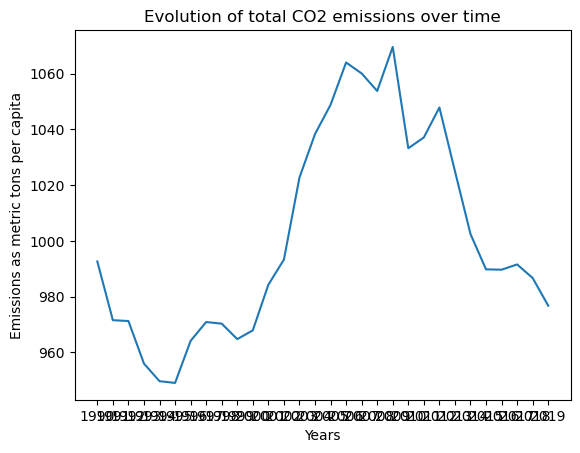

In [22]:
from matplotlib import pyplot as plt
plt.plot(total_emissions)
plt.xlabel("Years")
plt.ylabel("Emissions as metric tons per capita")
plt.title("Evolution of total CO2 emissions over time")
plt.show


__Plot cumulative carbon emissions__

<function matplotlib.pyplot.show(close=None, block=None)>

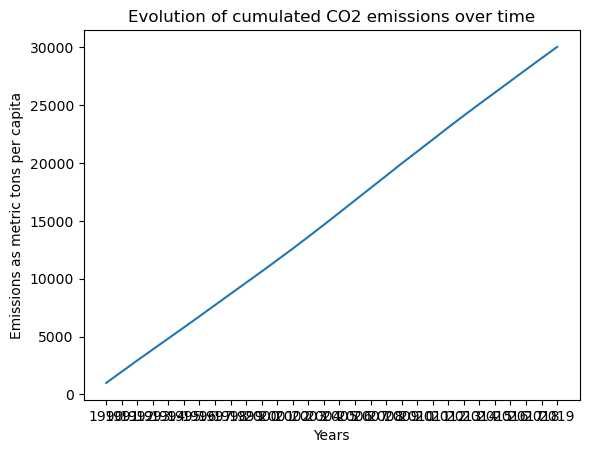

In [16]:
import numpy as np
plt.plot(total_emissions.cumsum())
plt.xlabel("Years")
plt.ylabel("Emissions as metric tons per capita")
plt.title("Evolution of cumulated CO2 emissions over time")
plt.show

__Propose some plots to visualize the contribution of the main contributors to yearly carbon emissions and to cumulative carbon emissions. You can get inspiration from [ourworldindata](https://ourworldindata.org/co2-emissions).__

_We could use a pie Chart of Global Emissions by Top 10 Emitters. This plot would show us the percentage of global carbon emissions of the top 10 emitters, with each country's contribution shown as a colored segment of a pie chart in order to provide the relative contributions of each country to global emissions._
_We could also use an area chart of cumulative emissions by top emitters: This plot shows the cumulative carbon emissions over time for the top emitters, with each country's contribution shown as a colored area of a stacked area chart. This plot allows for easy comparison of the contributions of different countries to cumulative emissions._

### The Kusnetz curve

We are now interested in the relation between carbon emission and economic development. To this purpose, we would like to run a *simple* regression

$$\frac{ \text{emissions}_{i t} }{ \text{population}_{i t} } = \alpha + \beta*\frac{ \text{gdp}_{i t}}{\text{population}_{i t}} + \text{other factors}_{i t}$$

where $i$ is the country index and $t$ the time index. In a first step we will simply assume that the total effect of all `other factors` is normally distributed.

We would then like to consider variants of this regression in order to test the environment Kuznets curve hypothesis.

__Briefly summarize the environmental Kuznets curve hypothesis__

(hint: perform a small websearch. Try to identify your sources)

_The Environmental Kuznets Curve hypothesis postulates an inverted-U-shaped relationship between different pollutants and per capita income, i.e., environmental pressure increases up to a certain level as income goes up; after that, it decreases. The environmental pollution increases at the beginning of economic growth. However, when it passes a certain level of income, the economic growth allows environmental remediation._ from Environmental Kuznets Curve: The Evidence from BSEC Countries* - / EGE ACADEMIC REVIEW and "Environmental Kuznets Curve Hypothesis: A Survey" from Ecological Economics

__Prepare the data__

From the world bank website, download data for historical real gdp and population. 

Perform the same steps as in the first part for both series then `merge` the resulting long databases "on" the `Country Code` and `Date` columns.

You should obtain one single database `data` containing the columns `["Country Name","Country Code","Indicator Name","Indicator Code","Date", "Emissions", "GDP", "Population"]`


In [26]:
df_gdp = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5358352.csv', skiprows=4)
df_gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
count,1.340000e+02,1.360000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.490000e+02,1.520000e+02,1.550000e+02,1.600000e+02,1.600000e+02,...,2.590000e+02,2.600000e+02,2.580000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.550000e+02,2.520000e+02,2.450000e+02,0.0
mean,7.103309e+10,7.186603e+10,7.549842e+10,8.144478e+10,8.941392e+10,9.084572e+10,1.010890e+11,1.048751e+11,1.100032e+11,1.216457e+11,...,2.477220e+12,2.538873e+12,2.400201e+12,2.444669e+12,2.619922e+12,2.783541e+12,2.845284e+12,2.790295e+12,3.276616e+12,NaN
std,2.132401e+11,2.208573e+11,2.354226e+11,2.532708e+11,2.769939e+11,2.909741e+11,3.185999e+11,3.369853e+11,3.589008e+11,3.950250e+11,...,8.385432e+12,8.597524e+12,8.158733e+12,8.314435e+12,8.847933e+12,9.417930e+12,9.586893e+12,9.387492e+12,1.079655e+13,NaN
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.861749e+07,3.875969e+07,3.681166e+07,4.162950e+07,4.521766e+07,4.781829e+07,5.422315e+07,5.505471e+07,6.310096e+07,NaN
25%,5.151683e+08,5.215510e+08,5.354690e+08,5.336845e+08,5.526379e+08,5.929812e+08,6.427026e+08,6.264909e+08,6.454036e+08,6.912229e+08,...,8.488220e+09,9.029027e+09,8.589120e+09,8.595956e+09,9.252834e+09,9.880676e+09,1.088080e+10,1.016305e+10,1.226939e+10,NaN
50%,2.976974e+09,2.966849e+09,3.050700e+09,3.570681e+09,3.432183e+09,3.120871e+09,3.549759e+09,3.384063e+09,4.064739e+09,4.759106e+09,...,5.094967e+10,5.339963e+10,4.966795e+10,4.984049e+10,5.472660e+10,5.700369e+10,6.113687e+10,5.715932e+10,6.740429e+10,NaN
75%,2.976519e+10,2.822553e+10,2.788859e+10,3.229580e+10,2.974366e+10,2.834471e+10,2.947510e+10,3.076382e+10,3.420277e+10,3.741948e+10,...,5.373933e+11,5.478617e+11,5.020845e+11,5.156547e+11,5.492678e+11,5.554554e+11,5.700678e+11,6.254289e+11,8.190352e+11,NaN
max,1.392273e+12,1.448622e+12,1.550544e+12,1.671610e+12,1.830287e+12,1.993900e+12,2.163894e+12,2.302529e+12,2.485213e+12,2.741172e+12,...,7.760623e+13,7.973264e+13,7.518636e+13,7.646936e+13,8.140950e+13,8.646696e+13,8.765425e+13,8.511634e+13,9.652743e+13,NaN


In [24]:
df_pop=pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2_5358404.csv', skiprows=4)
df_pop.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,0.0
mean,1.172187e+08,1.188268e+08,1.209957e+08,1.236763e+08,1.263792e+08,1.291211e+08,1.319789e+08,1.348350e+08,1.377713e+08,1.408128e+08,...,2.925870e+08,2.964856e+08,3.003545e+08,3.042155e+08,3.080704e+08,3.118393e+08,3.155191e+08,3.190983e+08,3.223248e+08,NaN
std,3.693371e+08,3.738947e+08,3.806132e+08,3.893042e+08,3.980380e+08,4.069033e+08,4.162308e+08,4.255158e+08,4.350875e+08,4.450496e+08,...,9.184860e+08,9.299558e+08,9.412781e+08,9.525129e+08,9.637185e+08,9.745580e+08,9.850384e+08,9.950997e+08,1.004098e+09,NaN
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.069400e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,NaN
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.697753e+06,1.743309e+06,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,NaN
50%,3.757486e+06,3.887144e+06,4.023896e+06,4.139356e+06,4.224612e+06,4.277636e+06,4.331825e+06,4.385700e+06,4.450934e+06,4.530800e+06,...,1.014958e+07,1.028212e+07,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,NaN
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.023395e+07,6.078914e+07,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,NaN
max,3.031565e+09,3.072511e+09,3.126935e+09,3.193509e+09,3.260518e+09,3.328285e+09,3.398561e+09,3.468457e+09,3.540255e+09,3.614669e+09,...,7.229185e+09,7.317509e+09,7.404911e+09,7.491934e+09,7.578158e+09,7.661776e+09,7.742682e+09,7.820982e+09,7.888409e+09,NaN


In [27]:
df2_long=pd.melt(df_gdp,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],var_name="Date",value_name= "GDP")
df2_long.dropna()

,Country Name,Country Code,Indicator Name,Indicator Code,Date,GDP
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1960,2.129152e+10
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.040414e+10
13,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.860567e+10
14,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,1960,6.592694e+09
...,...,...,...,...,...,...
16486,Samoa,WSM,GDP (current US$),NY.GDP.MKTP.CD,2021,8.438424e+08
16487,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2021,9.412034e+09
16489,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2021,4.190150e+11
16490,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2021,2.214763e+10


In [28]:
df3_long=pd.melt(df_pop,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],var_name="Date",value_name= "Population")
df3_long.dropna()

,Country Name,Country Code,Indicator Name,Indicator Code,Date,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54608.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130692579.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97256290.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5357195.0
...,...,...,...,...,...,...
16487,Kosovo,XKX,"Population, total",SP.POP.TOTL,2021,1786038.0
16488,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2021,32981641.0
16489,South Africa,ZAF,"Population, total",SP.POP.TOTL,2021,59392255.0
16490,Zambia,ZMB,"Population, total",SP.POP.TOTL,2021,19473125.0


In [29]:
df_kuznetz= df_long.merge(df2_long,on=["Date","Country Name","Country Code"]).merge(df3_long, on=["Date","Country Name","Country Code"])
df_kuznetz.dropna()


,Country Name,Country Code,Indicator Name_x,Indicator Code_x,Date,Emissions,Indicator Name_y,Indicator Code_y,GDP,Indicator Name,Indicator Code,Population
7981,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.982136,GDP (current US$),NY.GDP.MKTP.CD,2.532352e+11,"Population, total",SP.POP.TOTL,3.098907e+08
7983,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.473669,GDP (current US$),NY.GDP.MKTP.CD,1.218021e+11,"Population, total",SP.POP.TOTL,2.067390e+08
7984,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.554586,GDP (current US$),NY.GDP.MKTP.CD,1.122876e+10,"Population, total",SP.POP.TOTL,1.182864e+07
7985,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,1.819542,GDP (current US$),NY.GDP.MKTP.CD,2.028554e+09,"Population, total",SP.POP.TOTL,3.286542e+06
7986,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,7.653680,GDP (current US$),NY.GDP.MKTP.CD,1.029048e+09,"Population, total",SP.POP.TOTL,5.356900e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
15953,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,4.435673,GDP (current US$),NY.GDP.MKTP.CD,8.765425e+13,"Population, total",SP.POP.TOTL,7.742682e+09
15954,Samoa,WSM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,1.415729,GDP (current US$),NY.GDP.MKTP.CD,9.129445e+08,"Population, total",SP.POP.TOTL,2.119050e+05
15957,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,7.568640,GDP (current US$),NY.GDP.MKTP.CD,3.885320e+11,"Population, total",SP.POP.TOTL,5.808706e+07
15958,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2019,0.369958,GDP (current US$),NY.GDP.MKTP.CD,2.330867e+10,"Population, total",SP.POP.TOTL,1.838048e+07


__Regress per capita emissions on gdp per capita and comment.__

In [130]:
from statsmodels.formula import api as smf
df_kuznetz['GDP_per_capita']=df_kuznetz['GDP']/1000/df_kuznetz['Population']#on divise le PIB par mille car c'est en million et la population est en milliers

In [132]:
model=smf.ols(" Emissions ~ GDP_per_capita ", df_kuznetz)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     3473.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:41:31   Log-Likelihood:                -19885.
No. Observations:                6937   AIC:                         3.977e+04
Df Residuals:                    6935   BIC:                         3.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4500      0.059     41.326      0.000       2.334       2.566
GDP_per_capita     0.1852      0.003     58.931      0.000       0.179       0.191
==============================================================================
Omnibus:                     3880.879   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96298.037
Skew:                           2.186   Prob(JB):                         0.00
Kurtosis:                      20.721   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_The estimated regresssion is `emissions per capita = 2,45+ 0,1852 gdp per capita`. Both the intercept and the coefficient are significant, indicating that higher GDP per capita is associated with higher per capita emissions, holding other factors constant. The R-squared of the model is relatively low at 0.334, suggesting that other factors not included in the model may also be important in explaining per capita emissions._

__Split the sample into the three quantiles, based on gdp/capita in the last period. Run the same regression in all three subsamples. Comment.__


In [159]:
df_kuznetz['Quantile']= pd.qcut(df_kuznetz['GDP_per_capita'],q = 3, labels=['low', 'medium', 'high'])
model_low=smf.ols(" Emissions ~ GDP_per_capita ", df_kuznetz[df_kuznetz['Quantile'] == "low"])
res_low=model_low.fit()
res_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     68.42
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.89e-16
Time:                        13:37:32   Log-Likelihood:                -2221.9
No. Observations:                1493   AIC:                             4448.
Df Residuals:                    1491   BIC:                             4458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0444      0.073      0.605      0.545      -0.100       0.189
GDP_per_capita     1.2173      0.147      8.272      0.000       0.929       1.506
==============================================================================
Omnibus:                     1261.416   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26143.353
Skew:                           4.011   Prob(JB):                         0.00
Kurtosis:                      21.865   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
model_medium=smf.ols(" Emissions ~ GDP_per_capita ", df_kuznetz[df_kuznetz['Quantile'] == "medium"])
res_medium=model_medium.fit()
res_medium.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     274.8
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           9.77e-59
Time:                        13:38:08   Log-Likelihood:                -5698.0
No. Observations:                2600   AIC:                         1.140e+04
Df Residuals:                    2598   BIC:                         1.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7320      0.099      7.418      0.000       0.539       0.926
GDP_per_capita     0.6774      0.041     16.576      0.000       0.597       0.758
==============================================================================
Omnibus:                     1316.986   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7900.449
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      10.071   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
model_high=smf.ols(" Emissions ~ GDP_per_capita ", df_kuznetz[df_kuznetz['Quantile'] == "high"])
res_high=model_high.fit()
res_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     427.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.37e-88
Time:                        13:38:39   Log-Likelihood:                -8941.7
No. Observations:                2844   AIC:                         1.789e+04
Df Residuals:                    2842   BIC:                         1.790e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7100      0.152     37.652      0.000       5.413       6.007
GDP_per_capita     0.1068      0.005     20.676      0.000       0.097       0.117
==============================================================================
Omnibus:                     1447.885   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12763.970
Skew:                           2.245   Prob(JB):                         0.00
Kurtosis:                      12.357   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_These three linear regressions show us that the higher the GDP per capita of countries, the higher the R-squared. This means that the model is more predictive for countries with a "high" GDP, the higher their GDP per capita, the higher their per capita emissions. This partly confirms the Kuznetz curve hypothesis_


__Instead of splitting the sample, run a nonlinear regression:__

$$\frac{ \text{emissions}_{i t} }{ \text{population}_{i t} } = \alpha + \beta_1*\frac{ \text{gdp}_{i t}}{\text{population}_{i t}} + \beta_2*\left( \frac{ \text{gdp}_{i t}}{\text{population}_{i t}} \right)^2 + \text{other factors}_{i t}$$

Justify why $\beta_2<0$ can be interpreted as a proof of the environmental Kuznets hypothesis. Comment.



In [166]:
import numpy as np
nonlinear_regression=smf.ols('Emissions ~ GDP_per_capita + np.power(GDP_per_capita, 2)',df_kuznetz)
res_nl=nonlinear_regression.fit()
res_nl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     3019.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:49:50   Log-Likelihood:                -19121.
No. Observations:                6937   AIC:                         3.825e+04
Df Residuals:                    6934   BIC:                         3.827e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5088      0.058     26.113      0.000       1.395       1.622
GDP_per_capita                  0.3719      0.005     69.887      0.000       0.361       0.382
np.power(GDP_per_capita, 2)    -0.0024   5.76e-05    -41.345      0.000      -0.002      -0.002
==============================================================================
Omnibus:                     4662.808   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103561.456
Skew:                           2.902   Prob(JB):                         0.00
Kurtosis:                      21.017   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_The coefficient on the quadratic term, 𝛽2, is negative, standing at -0,0024, which support the hypothesis that the relationship between emissions and GDP per capita is U-shaped and consistent with the EKH._

__(Bonus) Suggest a way to improve the regression.__

_this result alone does not provide conclusive proof of the EKH, as the coefficient is not statistically significant and as there may be other factors that influence the relationship between emissions and GDP per capita_

## Predicting booking cancellations

The scientific review Data-in-Brief, publishes raw data after a rigorous referee process.

The following [entry](https://www.data-in-brief.com/article/S2352-3409(18)31519-1/fulltext) contains booking data for two hotels in Portugal, with many informations about the clients.

Your goal is to propose a machine learning model to predict whether a given booking will be cancelled.

(note that the dataset is rather large and that some operations may take some time to complete)


### Preparation

__Import the dataset. Describe it.__

In [34]:
import pandas
df = pandas.read_csv("hotel_booking.csv")

In [35]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


__Split the dataset between a train set and a validation set.__

The validation set should not be touched until the very end.

In [31]:
import sklearn
import sklearn.model_selection

In [38]:
df_ml, df_validation = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=56)
# until the very last question, you should use *only* the training set

__Split the `df_ml` dataframe between a training set and a test set.__

In [37]:
df_train, df_test = sklearn.model_selection.train_test_split(df_ml)
# the various algorithms can be trained and tested using df_train and df_test

### Training

__Justify why a machine learning model seems appropriate to predict cancellation. Which one(s) could you use?__

__Implement two or more classification models, to predict cancellation.__

__Compare their performance on the test set. Which one would you choose?__

### Validation

__Using your preferred model, use the validation set to compute the confusion matrix. Comment.__

In [177]:
s='The rain in Spain stays mainly in the plane'
s[s.index('m'):s.index('S')+5]



'mainl'